In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
#CDNOW_master.txt


### 第一部分：数据类型处理
- 数据加载
    - 字段含义：
        - user_id:用户ID
        - order_dt:购买日期
        - order_product:购买产品的数量
        - order_amount:购买金额
- 观察数据
    - 查看数据的数据类型
    - 数据中是否存储在缺失值
    - 将order_dt转换成时间类型
    - 查看数据的统计描述
    - 在源数据中添加一列表示月份:astype('datetime64[M]')

In [6]:
df = pd.read_csv('./data/CDNOW_master.txt',header=None,sep='\s+',names=['user_id','order_dt','order_product','order_amount'])
df.head()

,user_id,order_dt,order_product,order_amount
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [11]:
#查看数据类型
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   user_id        69659 non-null  int64         
 1   order_dt       69659 non-null  datetime64[ns]
 2   order_product  69659 non-null  int64         
 3   order_amount   69659 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 2.1 MB


In [28]:
#order_dt转换成时间序列，且加一列为购买商品的月份
df['order_dt'] = pd.to_datetime(df['order_dt'],format="%Y%m%d")
df.head()

,user_id,order_dt,order_product,order_amount
0,1,1970-01-01 00:00:00.019970101,1,11.77
1,2,1970-01-01 00:00:00.019970112,1,12.00
2,2,1970-01-01 00:00:00.019970112,5,77.00
3,3,1970-01-01 00:00:00.019970102,2,20.76
4,3,1970-01-01 00:00:00.019970330,2,20.76


In [6]:
df['month'] = df['order_dt'].astype('datetime64[M]')
df.head()

,user_id,order_dt,order_product,order_amount,month
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01


### 第二部分：按月数据分析
- 用户每月花费的总金额
    - 绘制曲线图展示
- 所有用户每月的产品购买量
- 所有用户每月的消费总次数
- 统计每月的消费人数

In [7]:
df.groupby(by='month')['order_amount'].sum()

month
1997-01-01    299060.17
1997-02-01    379590.03
1997-03-01    393155.27
1997-04-01    142824.49
1997-05-01    107933.30
1997-06-01    108395.87
1997-07-01    122078.88
1997-08-01     88367.69
1997-09-01     81948.80
1997-10-01     89780.77
1997-11-01    115448.64
1997-12-01     95577.35
1998-01-01     76756.78
1998-02-01     77096.96
1998-03-01    108970.15
1998-04-01     66231.52
1998-05-01     70989.66
1998-06-01     76109.30
Name: order_amount, dtype: float64

In [9]:
#所有用户每月的产品购买量
df.groupby(by='month')['order_product'].sum()

month
1997-01-01    19416
1997-02-01    24921
1997-03-01    26159
1997-04-01     9729
1997-05-01     7275
1997-06-01     7301
1997-07-01     8131
1997-08-01     5851
1997-09-01     5729
1997-10-01     6203
1997-11-01     7812
1997-12-01     6418
1998-01-01     5278
1998-02-01     5340
1998-03-01     7431
1998-04-01     4697
1998-05-01     4903
1998-06-01     5287
Name: order_product, dtype: int64

In [10]:
#所有用户每月的消费总次数
df.groupby(by='month')['user_id'].count()

month
1997-01-01     8928
1997-02-01    11272
1997-03-01    11598
1997-04-01     3781
1997-05-01     2895
1997-06-01     3054
1997-07-01     2942
1997-08-01     2320
1997-09-01     2296
1997-10-01     2562
1997-11-01     2750
1997-12-01     2504
1998-01-01     2032
1998-02-01     2026
1998-03-01     2793
1998-04-01     1878
1998-05-01     1985
1998-06-01     2043
Name: user_id, dtype: int64

In [23]:
#统计每月的消费人数
df.groupby(by='month')['user_id'].nunique()

month
1997-01-01    7846
1997-02-01    9633
1997-03-01    9524
1997-04-01    2822
1997-05-01    2214
1997-06-01    2339
1997-07-01    2180
1997-08-01    1772
1997-09-01    1739
1997-10-01    1839
1997-11-01    2028
1997-12-01    1864
1998-01-01    1537
1998-02-01    1551
1998-03-01    2060
1998-04-01    1437
1998-05-01    1488
1998-06-01    1506
Name: user_id, dtype: int64

### 第三部分：用户个体消费数据分析
- 各个用户消费金额和消费产品数量的散点图
- 各个用户消费总金额的直方分布图(消费金额在1000之内的分布)
- 各个用户消费的总数量的直方分布图(消费商品的数量在100次之内的分布)

In [28]:
#各个用户消费金额和消费产品数量的散点图
users_amount_s = df.groupby(by='user_id')['order_amount'].sum()
users_product_s = df.groupby(by='user_id')['order_product'].sum()

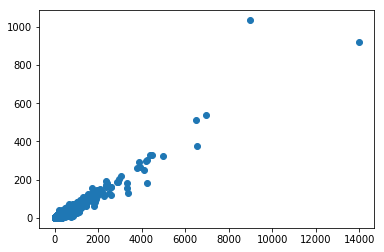

In [29]:
plt.scatter(users_amount_s,usea_product_s)

In [33]:
#各个用户消费总金额的直方分布图(消费金额在1000之内的分布)
#1.先将满足要求的用户的行数据找出，在做分组聚合
user_amount_1000_s  = df.query('order_amount <= 1000').groupby(by='user_id')['order_amount'].sum()
user_amount_1000_s

user_id
1         11.77
2         89.00
3        156.46
4        100.50
5        385.61
6         20.99
7        264.67
8        197.66
9         95.85
10        39.31
11        58.55
12        57.06
13        72.94
14        29.92
15        52.87
16        79.87
17        73.22
18        14.96
19       175.12
20       653.01
21        75.11
22        14.37
23        24.74
24        57.77
25       137.53
26       102.69
27       135.87
28        90.99
29       435.81
30        28.34
          ...  
23541     57.34
23542     77.43
23543     50.76
23544    134.63
23545     24.99
23546     13.97
23547     23.54
23548     23.54
23549     27.13
23550     25.28
23551    264.63
23552     49.38
23553     98.58
23554     36.37
23555    189.18
23556    203.00
23557     14.37
23558    145.60
23559    111.65
23560     18.36
23561     83.46
23562     29.33
23563     58.75
23564     70.01
23565     11.77
23566     36.00
23567     20.97
23568    121.70
23569     25.74
23570     94.08
Name: order_amou

(array([2.3172e+04, 3.0200e+02, 5.6000e+01, 1.8000e+01, 6.0000e+00,
        5.0000e+00, 4.0000e+00, 1.0000e+00, 0.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([    0.    ,   699.5465,  1399.093 ,  2098.6395,  2798.186 ,
         3497.7325,  4197.279 ,  4896.8255,  5596.372 ,  6295.9185,
         6995.465 ,  7695.0115,  8394.558 ,  9094.1045,  9793.651 ,
        10493.1975, 11192.744 , 11892.2905, 12591.837 , 13291.3835,
        13990.93  ]),
 <a list of 20 Patch objects>)

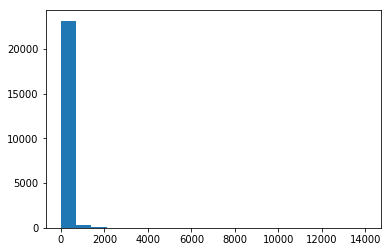

In [35]:
plt.hist(user_amount_1000_s,bins=20)

In [38]:
#各个用户消费的总数量的直方分布图(消费商品的数量在100之内的分布)
df.query('order_product <= 100').groupby(by='user_id')['order_product'].sum()

user_id
1         1
2         6
3        16
4         7
5        29
6         1
7        18
8        18
9         6
10        3
11        4
12        4
13        4
14        2
15        4
16        8
17        5
18        1
19       11
20       46
21        4
22        1
23        2
24        4
25       12
26        6
27       10
28        7
29       28
30        2
         ..
23541     2
23542     5
23543     2
23544    12
23545     1
23546     1
23547     2
23548     2
23549     2
23550     2
23551    12
23552     4
23553     8
23554     3
23555    14
23556    15
23557     1
23558    11
23559     8
23560     1
23561     6
23562     2
23563     3
23564     5
23565     1
23566     2
23567     1
23568     6
23569     2
23570     5
Name: order_product, Length: 23570, dtype: int64

### 第四部分：用户消费行为分析
- 用户第一次消费的月份分布，和人数统计
    - 绘制线形图
- 用户最后一次消费的时间分布，和人数统计
    - 绘制线形图
- 新老客户的占比
    - 消费一次为新用户
    - 消费多次为老用户
        - 分析出每一个用户的第一个消费和最后一次消费的时间
            - agg(['func1','func2']):对分组后的结果进行指定多种形式的聚合
        - 分析出新老客户的消费比例


In [53]:
# 用户第一次消费的月份分布，和人数统计
# 绘制线形图
# 用户最后一次消费的时间分布，和人数统计
# 绘制线形图
df.groupby(by='user_id')['month'].min().value_counts()

1997-02-01    8476
1997-01-01    7846
1997-03-01    7248
Name: month, dtype: int64

In [54]:
#用户最后一次消费的月份分布，和人数统计
df.groupby(by='user_id')['month'].max().value_counts()

1997-02-01    4912
1997-03-01    4478
1997-01-01    4192
1998-06-01    1506
1998-05-01    1042
1998-03-01     993
1998-04-01     769
1997-04-01     677
1997-12-01     620
1997-11-01     609
1998-02-01     550
1998-01-01     514
1997-06-01     499
1997-07-01     493
1997-05-01     480
1997-10-01     455
1997-09-01     397
1997-08-01     384
Name: month, dtype: int64

In [56]:
#新老客户的占比:
df_new_old = df.groupby(by='user_id')['order_dt'].agg(['min','max'])
(df_new_old['min'] == df_new_old['max']).value_counts()

True     12054
False    11516
dtype: int64

### 第五部分：用户的生命周期
- 将用户划分为活跃用户和其他用户
    - 统计每个用户每个月的消费次数
    - 统计每个用户每个月是否消费，消费记录为1否则记录为0
        - 知识点：DataFrame的apply和applymap的区别
            - applymap:返回df
            - 将函数做用于DataFrame中的所有元素(elements)
            - apply:返回Series
            - apply()将一个函数作用于DataFrame中的每个行或者列
   

In [85]:
#统计每个用户每个月的消费次数
df_purchase = df.pivot_table(index='user_id',values='order_dt',aggfunc='count',columns='month',fill_value=0)
df_purchase.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,2,0,0,0,0,0,1,0
4,2,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,2,1,0,1,1,1,1,0,1,0,0,2,1,0,0,0,0,0


In [87]:
#统计每个用户每个月是否消费，消费记录为1否则记录为0
df_purchase = df_purchase.applymap(lambda x:1 if x > 0 else 0)

In [88]:
df_purchase.head()

month,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
user_id,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0
